<a href="https://colab.research.google.com/github/daviethedeveloper/TensorFlowNotes/blob/main/Multi_Class_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification

> Target
> Model classes
1. Become one with the data
2. Preprocess the data
3. Create a model ( start with a baseline)
4. Fit the model ( want to overfitt ~ tweak )
5. Evaluate the model
6. Adjust different hyperparameters and improve the model ( beat the base model created ~ reduce overfitting)

In [ ]:
# Packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Create the model a little bit more easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# TensorFlow packages
from tensorflow.python.ops.gen_batch_ops import batch
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Import the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-06 15:22:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  57.6MB/s    in 6.1s    

2023-07-06 15:22:29 (80.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through the '10_food_classes_all_data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")

There are 2 directories and 0 images in '10_food_classes_all_data.'
There are 10 directories and 0 images in '10_food_classes_all_data/train.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry.'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza.'

In [ ]:
# Setup train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class Names
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(f'Class Names: {class_names}')

Class Names: ['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  """
  Get a random image - target directory as well as the target class getting from

  """

  target_folder = target_dir + target_class

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f'Name of Image: {random_image}')

  # Read in the image then plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])


  # Show the image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f'Image shape: {img.shape}')

  return img

Name of Image: ['754883.jpg']
Image shape: (341, 512, 3)


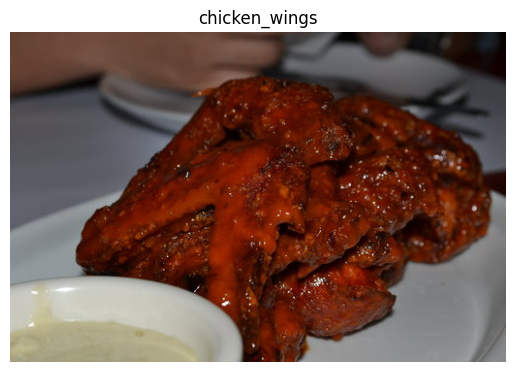

In [ ]:
# Visualize the Images
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
img

array([[[ 95,  62,  45],
        [ 95,  62,  45],
        [ 95,  62,  45],
        ...,
        [  5,   1,   0],
        [  6,   0,   0],
        [  6,   0,   0]],

       [[ 95,  62,  45],
        [ 95,  62,  45],
        [ 96,  63,  46],
        ...,
        [  5,   1,   0],
        [  6,   0,   0],
        [  6,   0,   0]],

       [[ 95,  62,  45],
        [ 95,  62,  45],
        [ 96,  63,  46],
        ...,
        [  5,   1,   0],
        [  6,   0,   0],
        [  6,   0,   0]],

       ...,

       [[165, 162, 129],
        [165, 162, 129],
        [164, 161, 128],
        ...,
        [136, 136, 138],
        [136, 136, 138],
        [135, 135, 137]],

       [[166, 163, 130],
        [165, 162, 129],
        [165, 162, 129],
        ...,
        [136, 136, 138],
        [135, 135, 137],
        [135, 135, 137]],

       [[167, 164, 131],
        [167, 164, 131],
        [166, 163, 130],
        ...,
        [136, 136, 138],
        [135, 135, 137],
        [134, 134, 136]]

In [ ]:
img.shape

(341, 512, 3)

### Preprocess the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

# Load data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a Model **Start with a BaseLine**
> Take the model presented in the CNN explainer TingVGG architecture

In [ ]:
# Creat the Model
# CNN Explainer shape (224, 224)

# Set the Seed
tf.random.set_seed(42)


# Build the Model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10), # changed to have 10 output neurons and using 'softmax'
    Activation(activation="softmax")
])

# Compile the Model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
235/235 [==============================] - 70s 230ms/step - loss: 6.5482 - accuracy: 0.1468 - val_loss: 2.2504 - val_accuracy: 0.1712
Epoch 2/5
235/235 [==============================] - 54s 232ms/step - loss: 1.9166 - accuracy: 0.3415 - val_loss: 2.3630 - val_accuracy: 0.1812
Epoch 3/5
235/235 [==============================] - 52s 220ms/step - loss: 1.3303 - accuracy: 0.5697 - val_loss: 2.5258 - val_accuracy: 0.2144
Epoch 4/5
235/235 [==============================] - 51s 219ms/step - loss: 0.6320 - accuracy: 0.8191 - val_loss: 3.4442 - val_accuracy: 0.2064
Epoch 5/5
235/235 [==============================] - 52s 220ms/step - loss: 0.2987 - accuracy: 0.9141 - val_loss: 4.2151 - val_accuracy: 0.1788


### Evaluate the Data

In [ ]:
model_8.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 15s 183ms/step - loss: 4.2151 - accuracy: 0.1788


[4.215054512023926, 0.17880000174045563]

In [ ]:
# Plot the validation and training curvers separately

def plot_loss_curves(history):
  """
  Returns loss curves for training and validation metrics
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]


  acurracy=history.history["accuracy"]
  val_acurracy=history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did it take to run

  # Plot the Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();


  # Plot the Accuracy
  plt.figure()
  plt.plot(epochs, acurracy, label="training_loss")
  plt.plot(epochs, val_acurracy, label="val_loss")
  plt.title("acurracy")
  plt.xlabel("epochs")
  plt.legend();


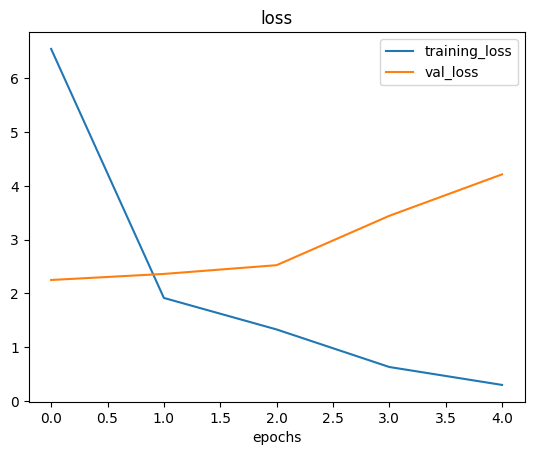

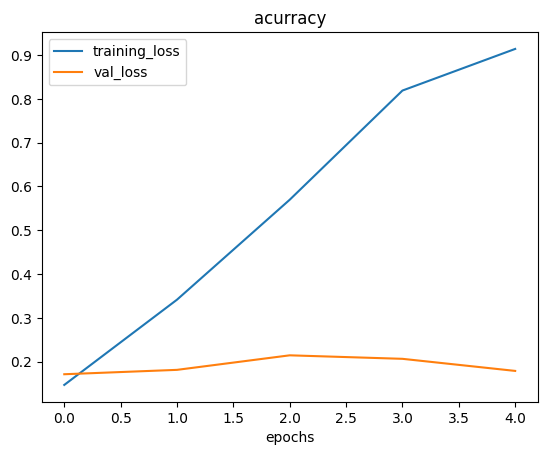

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history=history_8)

In [ ]:
# Check current Model summary
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

What does this loss curve mean??
Overfitting is happening, great results on the training data, but fails to generalized well on unseen data, performs poorly on the test data set.

### 6.Reduce Overfitting
> Beat the **baseline**
> How to beat the Baseline(not generalizing on unseen data)
Methods:
1. **Get more data**( Model more opp. to learn diverse patterns )
2. **Simplify the model** ( current model is overfitting, too complicated model... too many layers, learning too well ) reduce number of layers, reduce number of hidden units
3. **Data Augmentation** manipulates the training data, adds more diversity to the data, without altering the original data
4. **Transfer Learning** leverages the patterns a model has learned on similar data, use those patterns on my data set

In [ ]:
# Create a simplified model *remove 2 Conv2D* layers
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10), # changed to have 10 output neurons and using 'softmax'
    Activation(activation="softmax")
])

# Compile the Model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 51s 212ms/step - loss: 81.7871 - accuracy: 0.1124 - val_loss: 2.3862 - val_accuracy: 0.1224
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 2.1514 - accuracy: 0.2217 - val_loss: 2.4366 - val_accuracy: 0.1316
Epoch 3/5
235/235 [==============================] - 51s 215ms/step - loss: 1.7626 - accuracy: 0.3816 - val_loss: 2.6282 - val_accuracy: 0.1340
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 1.3416 - accuracy: 0.5413 - val_loss: 3.2504 - val_accuracy: 0.1516
Epoch 5/5
235/235 [==============================] - 51s 215ms/step - loss: 0.9948 - accuracy: 0.6647 - val_loss: 3.9545 - val_accuracy: 0.1516


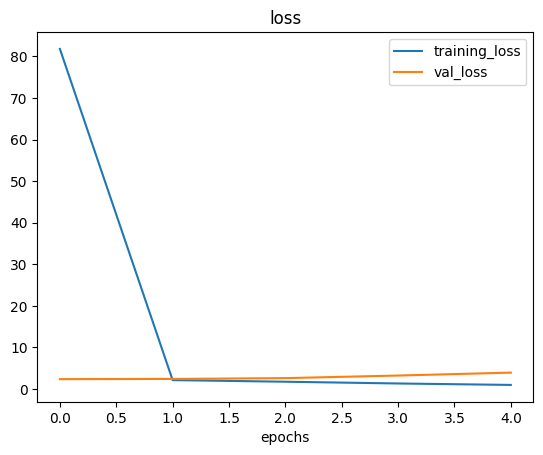

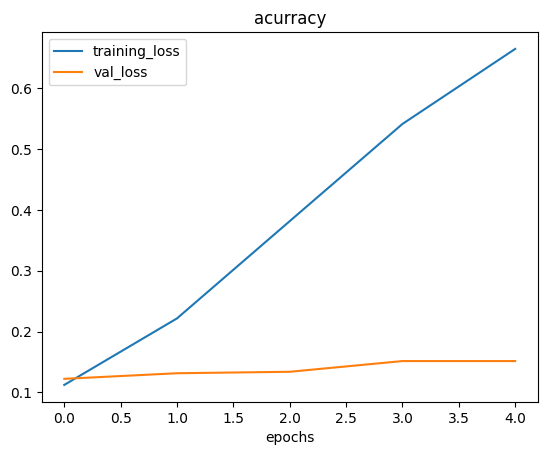

In [ ]:
# Plot the Loss Curves for model_9
plot_loss_curves(history=history_9)

In [ ]:
# Model Summary
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 activation_6 (Activation)   (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                  

**Note**
> Did not work out with the new model_9
> Use Data Augmentation next

### Use Augmentation to Reduce Overfitting

In [ ]:
# Use Augmentation in this the training data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
# Create a model using the data augmented fit it on the augmented data of 10 classes

# Set Seed
tf.random.set_seed(42)

# Clone model_8
model_10 = tf.keras.models.clone_model(model_8)

# Compile the clone model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.optimizers.Adam(),
                 metrics=["accuracy"])

Fit the model

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 2.2120 - accuracy: 0.1712

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 136s 567ms/step - loss: 2.2120 - accuracy: 0.1712 - val_loss: 214.0486 - val_accuracy: 0.1656
Epoch 2/5
235/235 [==============================] - 125s 530ms/step - loss: 2.0834 - accuracy: 0.2567 - val_loss: 182.3645 - val_accuracy: 0.1812
Epoch 3/5
235/235 [==============================] - 121s 516ms/step - loss: 2.0335 - accuracy: 0.2860 - val_loss: 124.2474 - val_accuracy: 0.2516
Epoch 4/5
235/235 [==============================] - 121s 514ms/step - loss: 2.0022 - accuracy: 0.3028 - val_loss: 120.8335 - val_accuracy: 0.2648
Epoch 5/5
235/235 [==============================] - 121s 513ms/step - loss: 1.9574 - accuracy: 0.3220 - val_loss: 269.2287 - val_accuracy: 0.1104


In [ ]:
model_10.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 14s 174ms/step - loss: 269.2287 - accuracy: 0.1104


[269.2287292480469, 0.1103999987244606]

In [ ]:
model_8.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 15s 185ms/step - loss: 4.2151 - accuracy: 0.1788


[4.215054035186768, 0.17880000174045563]

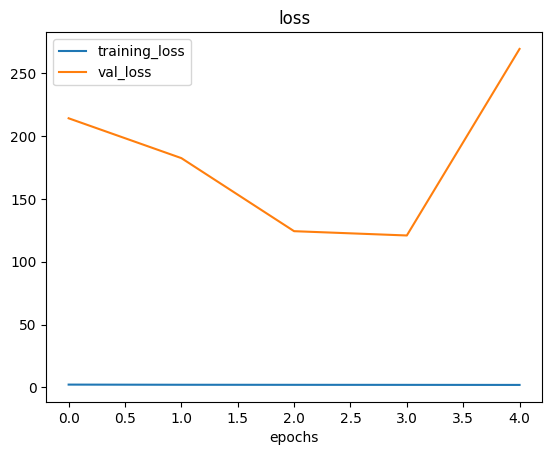

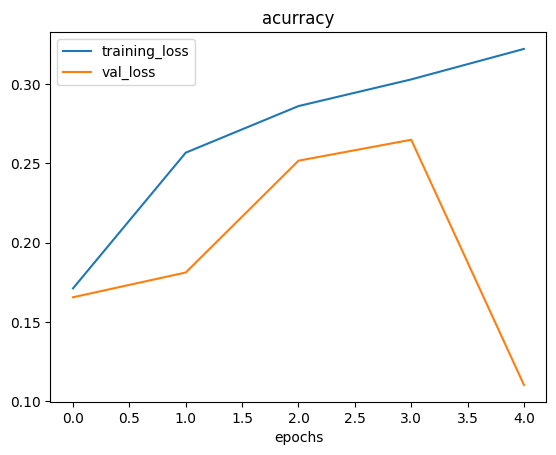

In [ ]:
plot_loss_curves(history=history_10)

### 7.Repeat till Satified with Model
> **Note**: Try to bring the loss curves closer together, imrpove the validation/accuracy,
* Run lots of experiements
* Increase layers/hidden unites (filters)
* Adjust learning rate (Adam learning rate working)
* Different hyperparameters in the ImageDataGenerator Instance
* Train for longer e.g (epochs=10) instead of 5
* Or Or Use Transfer Learning

In [ ]:
# Class names the model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-07-06 18:02:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-07-06 18:02:24 (33.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2023-07-06 18:02:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

In [ ]:

def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from the filename, turns it into a tensor and reshapes it to the target
  image shape (e.g image shape = (224, 224))
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the img into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # -----------------------------------------
  # Rescale the image
  img = img/255.

  return img

In [ ]:
# Make a prediction
def pred_plot_multiclass(model, filename, class_names=class_names):
  """
  Import an image located in the filename, makes a prediction with the model,
  plots the image with the predicted class as the title.
  """

  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction from the image *may need to exand dims
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted clas
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image with the predicted Title
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 [==============================] - 0s 36ms/step


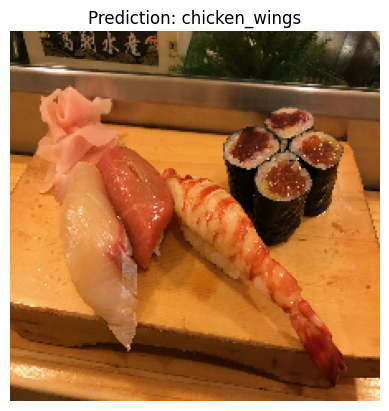

In [ ]:
pred_plot_multiclass(model=model_10,
                     filename="03-sushi.jpeg",
                     class_names=class_names)

Model did not perform well on custom images
... only got like 20% accuracy

### Saving and load model


In [ ]:
# Save model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 13s 160ms/step - loss: 269.2288 - accuracy: 0.1104


[269.228759765625, 0.1103999987244606]

In [ ]:
# Compare the load model to the existing model
model_10.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 13s 168ms/step - loss: 269.2288 - accuracy: 0.1104


[269.22882080078125, 0.1103999987244606]